### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [11]:
#!pip install pandas_profiling==2.10.0
from pandas_profiling import ProfileReport

In [63]:
#reading the data into a pandas dataframe
crop_data = pd.read_csv(r"E:\Spring 2021\FAI\Project\Crop_recommendation.csv")

In [64]:
#Top 5 enteries of the crop dataframe
crop_data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [65]:
print(f"Number of rows/examples and columns in the dataset: {crop_data.shape}")

Number of rows/examples and columns in the dataset: (2200, 8)


In [66]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Summary Statistics

In [67]:
crop_stats=crop_data.describe()
crop_stats = crop_stats.transpose()
crop_stats

count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117

### Profile Report

In [68]:
profile = ProfileReport(crop_data)
profile

### Univariate Analysis 

#### Scatter Plots

[]

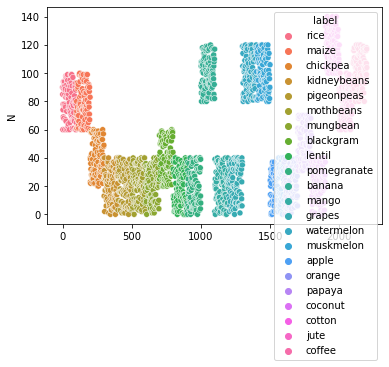

In [69]:
sns.scatterplot(x=crop_data.index, y=crop_data['N'], hue=crop_data['label'])
plt.plot()

[]

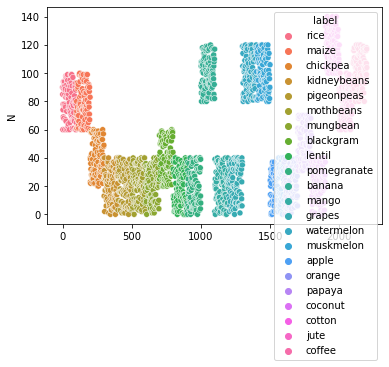

In [70]:
sns.scatterplot(x=crop_data.index, y=crop_data['N'], hue=crop_data['label'])
plt.plot()

[]

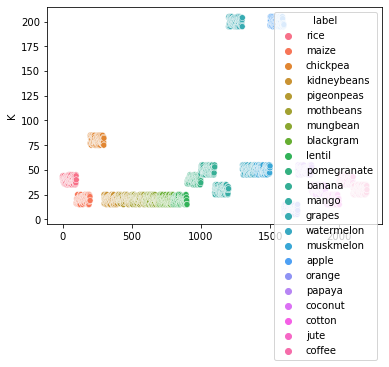

In [71]:
sns.scatterplot(x=crop_data.index, y=crop_data['K'], hue=crop_data['label'])
plt.plot()

[]

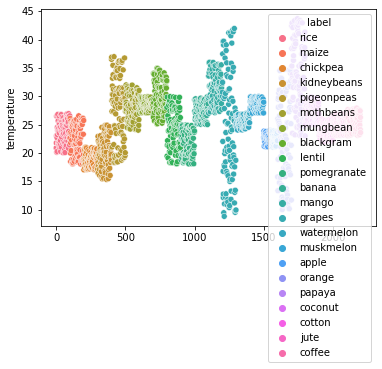

In [72]:
sns.scatterplot(x=crop_data.index, y=crop_data['temperature'], hue=crop_data['label'])
plt.plot()

[]

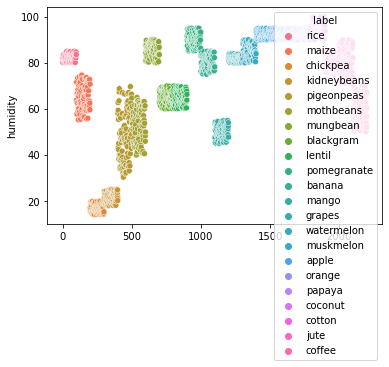

In [73]:
sns.scatterplot(x=crop_data.index, y=crop_data['humidity'], hue=crop_data['label'])
plt.plot()

[]

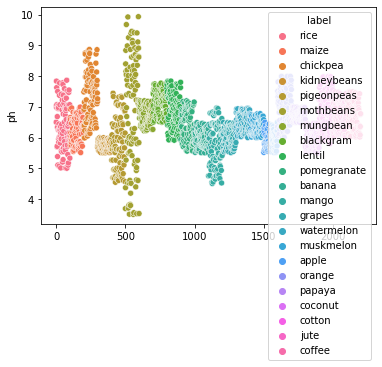

In [74]:
sns.scatterplot(x=crop_data.index, y=crop_data['ph'], hue=crop_data['label'])
plt.plot()

[]

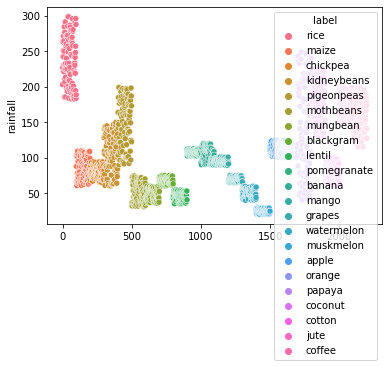

In [75]:
sns.scatterplot(x=crop_data.index, y=crop_data['rainfall'], hue=crop_data['label'])
plt.plot()

#### Histograms

<AxesSubplot:xlabel='N'>

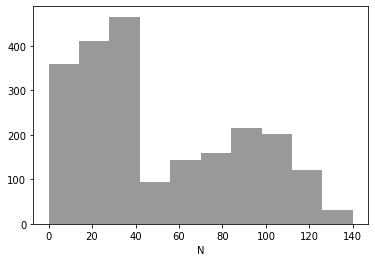

In [76]:
sns.distplot(crop_data['N'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='P'>

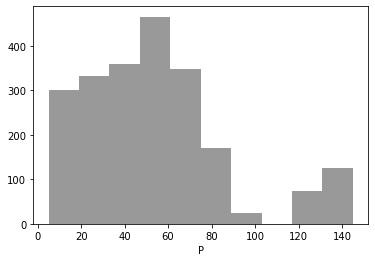

In [77]:
sns.distplot(crop_data['P'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='K'>

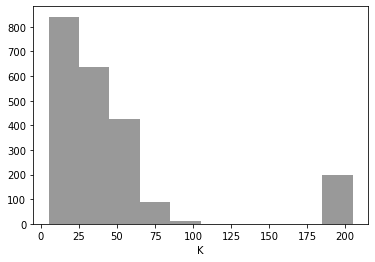

In [78]:
sns.distplot(crop_data['K'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='temperature'>

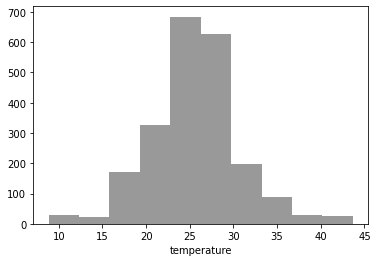

In [79]:
sns.distplot(crop_data['temperature'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='humidity'>

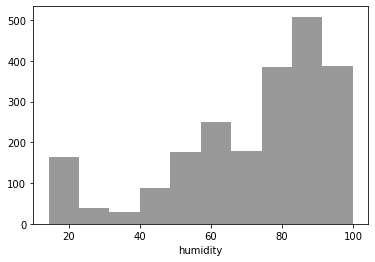

In [80]:
sns.distplot(crop_data['humidity'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='ph'>

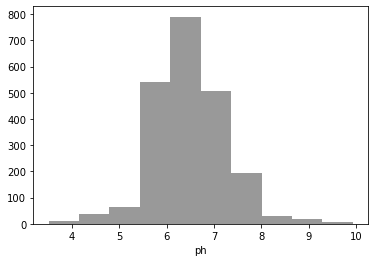

In [81]:
sns.distplot(crop_data['ph'], kde=False, color='black', bins=10)

<AxesSubplot:xlabel='rainfall'>

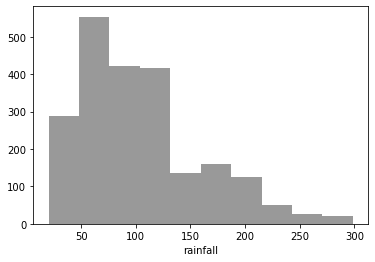

In [82]:
sns.distplot(crop_data['rainfall'], kde=False, color='black', bins=10)

### Kernel Density Estimation 

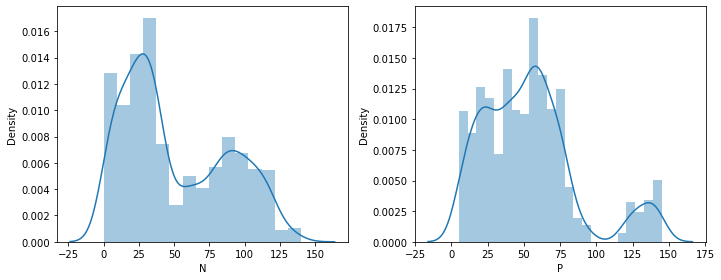

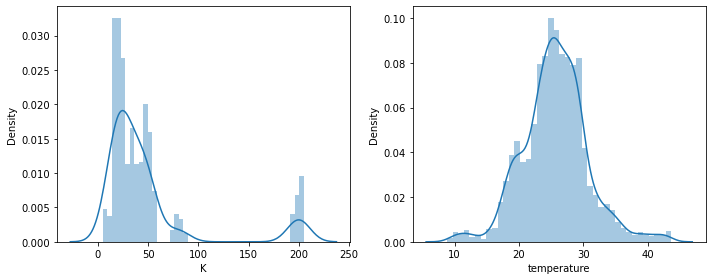

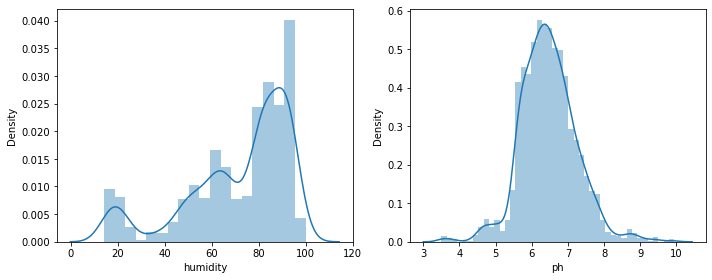

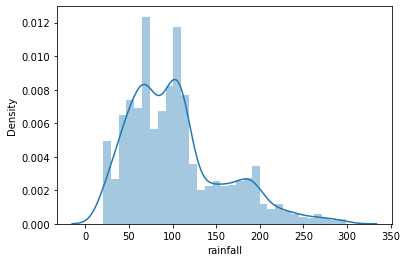

In [83]:
# Histograms

num_cols = ['N', 'P', 'K', 'temperature','humidity','ph','rainfall']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(crop_data[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(crop_data[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(crop_data[num_cols[i]], hist=True, kde=True)

#### Box Plot

[Text(0, 0, 'N'),
 Text(1, 0, 'P'),
 Text(2, 0, 'K'),
 Text(3, 0, 'temperature'),
 Text(4, 0, 'humidity'),
 Text(5, 0, 'ph'),
 Text(6, 0, 'rainfall')]

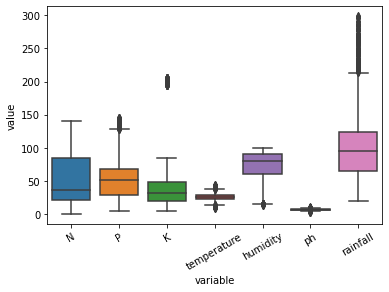

In [84]:
temp_df = crop_data.drop('label', axis=1)
ax=sns.boxplot(x='variable', y='value', data=pd.melt(temp_df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

#### Violin Plot

<AxesSubplot:xlabel='N', ylabel='label'>

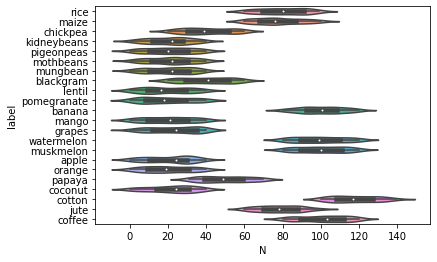

In [85]:
sns.violinplot(x=crop_data['N'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='P', ylabel='label'>

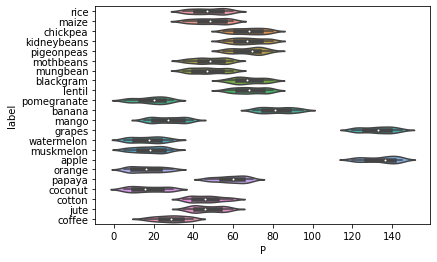

In [86]:
sns.violinplot(x=crop_data['P'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='K', ylabel='label'>

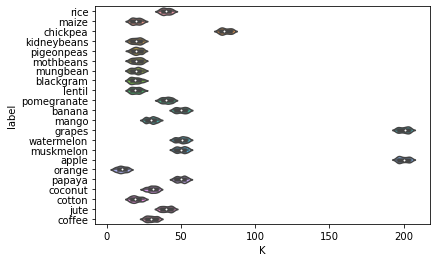

In [87]:
sns.violinplot(x=crop_data['K'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='temperature', ylabel='label'>

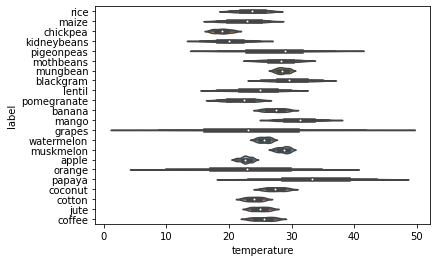

In [88]:
sns.violinplot(x=crop_data['temperature'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='humidity', ylabel='label'>

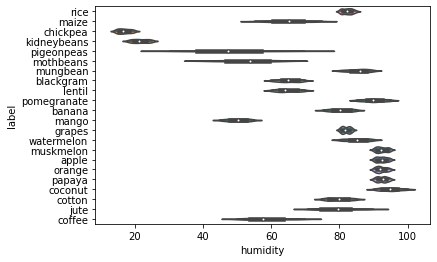

In [89]:
sns.violinplot(x=crop_data['humidity'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='ph', ylabel='label'>

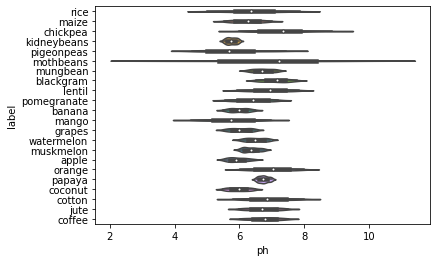

In [90]:
sns.violinplot(x=crop_data['ph'], y=crop_data['label'], data=crop_data)

<AxesSubplot:xlabel='rainfall', ylabel='label'>

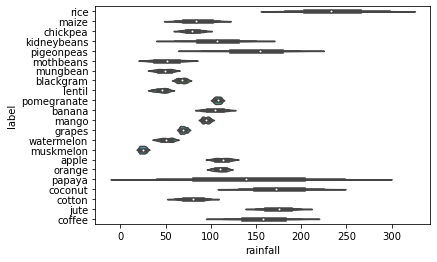

In [91]:
sns.violinplot(x=crop_data['rainfall'], y=crop_data['label'], data=crop_data)

### Bivariate Analysis 

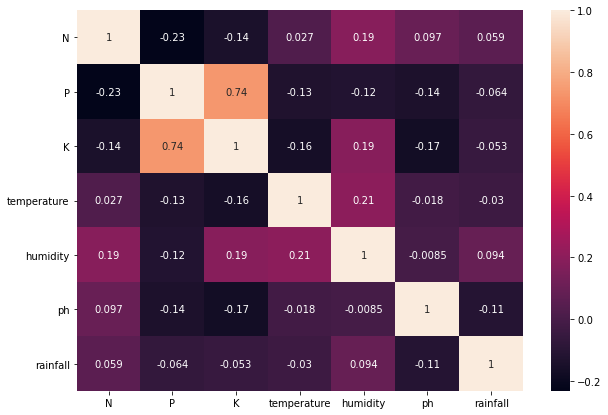

In [92]:
#Correlation Matrix
corrMatrix = crop_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Data Preprocessing

### Replacing the outliers in each column with the median value 

In [93]:
#Phosphorus
crop_data['P'] = np.where(crop_data['P'] >116 , 51, crop_data['P'])

In [94]:
#Potassium
crop_data['K'] = np.where(crop_data['K'] >70 , 32, crop_data['K'])

In [95]:
#temperature
crop_data['temperature'] = np.where(crop_data['temperature']<16, 25.5986932, crop_data['temperature'])
crop_data['temperature'] = np.where(crop_data['temperature']>35, 25.5986932, crop_data['temperature'])

In [96]:
#humidity
crop_data['humidity'] = np.where(crop_data['humidity']<28, 80.473145665, crop_data['humidity'])

In [97]:
#ph
crop_data['ph'] = np.where(crop_data['ph']<= 4.722342095374998,6.42504527,crop_data['ph'])

crop_data['ph'] = np.where(crop_data['ph']>=8.162813053874997,6.42504527,crop_data['ph'])

In [98]:
#rainfall
crop_data['rainfall'] = np.where(crop_data['rainfall']>=167,94.86762427,crop_data['rainfall'])

In [99]:
#Block to deterime the first quartile,third quartile and median values of each column
iqr = crop_data['temperature'].quantile(0.75)-crop_data['temperature'].quantile(0.25)
cut_off = iqr * 1.5
q1 = crop_data['temperature'].quantile(0.25)
q3 = crop_data['temperature'].quantile(0.75)
print("Median:",crop_data['temperature'].quantile(0.50)) 
print("IQR:",iqr)
print("First quartile:",q1)
print("Third quartile:",q3)
lower, upper = q1 - cut_off, q3 + cut_off
print("Lower:",lower)
print("Upper:",upper)
data = crop_data['temperature'].values
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Median: 25.5986932
IQR: 4.956387632499997
First quartile: 23.095716142500002
Third quartile: 28.052103775
Lower: 15.661134693750007
Upper: 35.486685223749994
Identified outliers: 0
Non-outlier observations: 2200


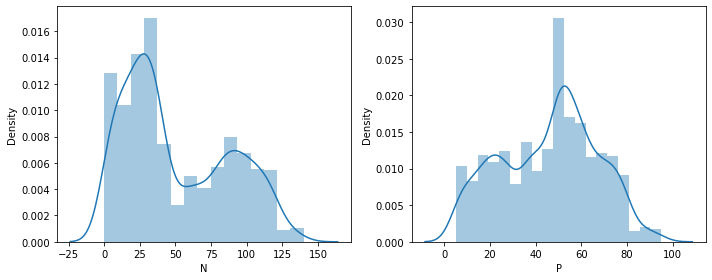

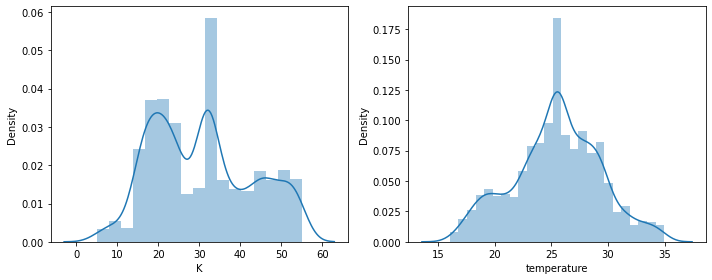

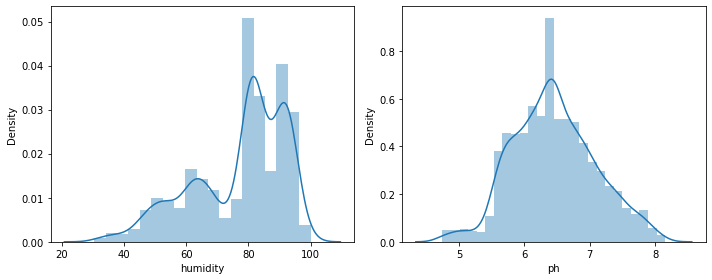

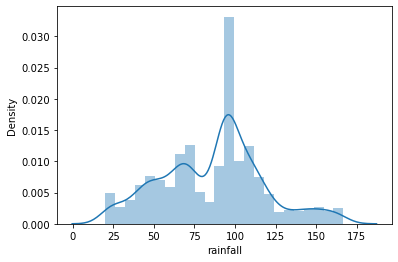

In [100]:
# Histograms after removal of outliers

num_cols = ['N', 'P', 'K', 'temperature','humidity','ph','rainfall']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(crop_data[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(crop_data[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(crop_data[num_cols[i]], hist=True, kde=True)

[Text(0, 0, 'N'),
 Text(1, 0, 'P'),
 Text(2, 0, 'K'),
 Text(3, 0, 'temperature'),
 Text(4, 0, 'humidity'),
 Text(5, 0, 'ph'),
 Text(6, 0, 'rainfall')]

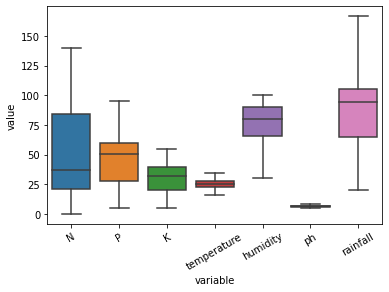

In [101]:
#Boxplot after removing outliers
temp_df = crop_data.drop('label', axis=1)
ax=sns.boxplot(x='variable', y='value', data=pd.melt(temp_df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

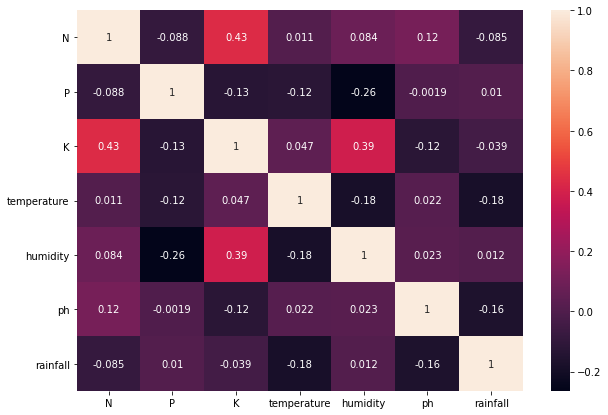

In [102]:
#Correlation Matrix
corrMatrix = crop_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Shuffling the dataframe 

In [103]:
#Shuffle the data
np.random.seed(10)
crop_data_shuffled = crop_data.sample(frac=1)


In [104]:
crop_data_shuffled

N   P   K  temperature   humidity        ph    rainfall       label
299    49  69  32    18.315615  80.473146  7.263119   81.787105    chickpea
1859   37  10  32    28.963183  95.163337  6.165085   94.867624     coconut
1939  122  48  16    24.654258  75.635071  6.307586   61.829801      cotton
2194   97  35  26    24.914610  53.741447  6.334610  166.254931      coffee
1861   31  29  35    27.187228  92.199068  6.137103  141.322058     coconut
...   ...  ..  ..          ...        ...       ...         ...         ...
2009   74  40  40    25.138428  83.120539  6.386260   94.867624        jute
1180    1  29  29    27.329614  49.303472  6.052026   93.531974       mango
1344  103  16  49    24.067315  81.640753  6.915717   51.752124  watermelon
527    24  37  21    30.573999  58.226868  5.818219   62.748038   mothbeans
1289   38  51  32    17.543830  82.947033  6.323723   73.770637      grapes

[2200 rows x 8 columns]

In [105]:
features = crop_data_shuffled[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data_shuffled['label']
labels = crop_data_shuffled['label']

In [106]:
features

N   P   K  temperature   humidity        ph    rainfall
299    49  69  32    18.315615  80.473146  7.263119   81.787105
1859   37  10  32    28.963183  95.163337  6.165085   94.867624
1939  122  48  16    24.654258  75.635071  6.307586   61.829801
2194   97  35  26    24.914610  53.741447  6.334610  166.254931
1861   31  29  35    27.187228  92.199068  6.137103  141.322058
...   ...  ..  ..          ...        ...       ...         ...
2009   74  40  40    25.138428  83.120539  6.386260   94.867624
1180    1  29  29    27.329614  49.303472  6.052026   93.531974
1344  103  16  49    24.067315  81.640753  6.915717   51.752124
527    24  37  21    30.573999  58.226868  5.818219   62.748038
1289   38  51  32    17.543830  82.947033  6.323723   73.770637

[2200 rows x 7 columns]

### Splitting the dataframe 

In [107]:
#Split the data into 60% train and 40% test(later will divide the test to validation and test data)
train_dataset , test_dataset = train_test_split(crop_data_shuffled, test_size=0.4,random_state=2)

print(train_dataset.shape)
print(test_dataset.shape)

(1320, 8)
(880, 8)


In [108]:
#Split test_dataset to 50% validation and 50% test
test_dataset, validation_dataset = train_test_split(test_dataset,test_size = 0.5,random_state=2)

print(test_dataset.shape)
print(validation_dataset.shape)

(440, 8)
(440, 8)


In [109]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset : {train_dataset.shape}")
print(f"Test dataset : {test_dataset.shape}")
print(f"Validation dataset : {validation_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset : (1320, 8)
Test dataset : (440, 8)
Validation dataset : (440, 8)


In [110]:
#Split the target column 
train_labels = train_dataset.iloc[:,-1]
test_labels = test_dataset.iloc[:,-1]
validation_labels = validation_dataset.iloc[:,-1]

#Drop label column from all datasets
train_dataset = train_dataset.drop("label",axis=1)
test_dataset = test_dataset.drop("label",axis=1)
validation_dataset = validation_dataset.drop("label",axis=1)


### Normalizing data 

In [111]:
#define a function to normalize the dataset
def norm(x):
    return (( x-crop_stats['mean'])/crop_stats['std'])


norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)
norm_val_data = norm(validation_dataset)

# SUPPORT VECTOR MACHINES

### Hyperparameter Tuning

In [112]:
from sklearn import svm
model = svm.SVC()
parameters_grid = {'gamma':[0.00001,0.0001,0.001,0.01,0.1],
             'C' :[0.1, 0.5,1]
             }
searcher = GridSearchCV(model,parameters_grid)
searcher.fit(norm_train_data,train_labels)
print("Best CV params:", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("test acc.:", searcher.score(norm_test_data,test_labels))


Best CV params: {'C': 1, 'gamma': 0.1}
Best CV accuracy 0.9409090909090908
test acc.: 0.9659090909090909


From the results of Hyperparameter tuning, considering C=1, gamma= 0.1, and kernel = Radial Basis Function(rbf)

In [113]:
import joblib
import os
import time
start = time.time()
svm_model = svm.SVC(C=1,kernel='rbf',gamma=0.1)
svm_model.fit(norm_train_data,train_labels)
end = time.time()
joblib.dump(svm_model, "svm.joblib")
print(f"SVM size: {np.round(os.path.getsize('svm.joblib') / 1024 / 1024, 2)} MB")
print("Time for SVM ", end-start)
y_pred = svm_model.predict(norm_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))

SVM size: 0.38 MB
Time for SVM  0.15205049514770508
Accuracy: 0.9659090909090909


In [114]:
print("Precision:",metrics.precision_score(test_labels, y_pred,average = None))
print("Recall:",metrics.recall_score(test_labels, y_pred,average=None))

Precision: [1.         1.         0.94444444 0.84210526 0.9        1.
 1.         1.         0.85714286 0.94736842 1.         0.95652174
 0.96551724 0.95833333 1.         1.         1.         1.
 1.         1.         0.88888889 1.        ]
Recall: [1.         1.         1.         0.94117647 1.         0.92857143
 1.         0.88888889 0.9        1.         0.91666667 0.95652174
 1.         0.95833333 1.         1.         0.90909091 1.
 1.         1.         0.84210526 1.        ]


Text(0.5, 1.0, 'Confusion Matrix')

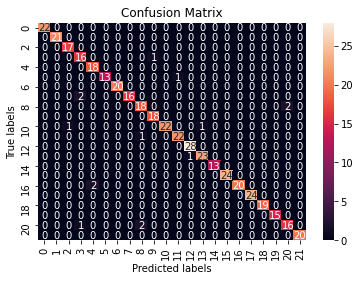

In [115]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = svm_model.predict(norm_test_data)
cm = confusion_matrix(test_labels,predict_results)

sns.heatmap(cm,annot= True,ax=ax) #annot=True to annotate cells

#labels,title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

### Plotting Decision Boundary 

In [119]:
svmplot=pd.read_csv(r"E:\Spring 2021\FAI\Project\svm.csv")
X=svmplot.iloc[:,:2].values
Y= svmplot.iloc[:,-1]
Y = LE.fit_transform(Y)
xtrain_plot, xtest_plot, ytrain_plot, ytest_plot = train_test_split(X, Y, test_size=0.4, random_state=23)

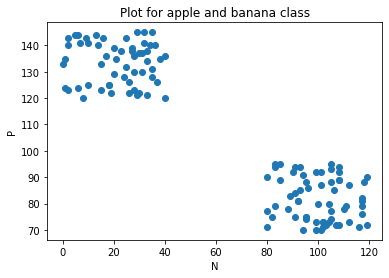

In [127]:
plt.scatter(xtrain_plot[:,0], xtrain_plot[:,1])
plt.title('Plot for apple and banana class')
plt.xlabel('N')
plt.ylabel('P')
plt.show()

In [156]:
#using the hyperparameters determined previously
classifier = svm.SVC(kernel='rbf',C=1,gamma=0.1)
# Fit data
classifier = classifier.fit(xtrain_plot, ytrain_plot)
predictions = classifier.predict(xtest_plot)

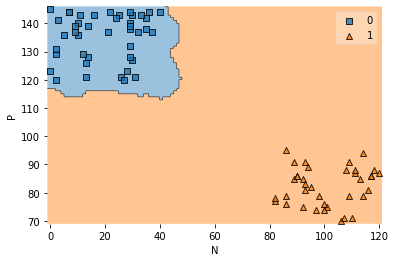

In [157]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(xtest_plot, ytest_plot, clf=classifier)
plt.xlabel('N')
plt.ylabel('P')
plt.show()

In [151]:
Xnew= crop_data_shuffled.iloc[0:300,:2].values
Ynew=crop_data_shuffled.iloc[0:300,-1]
Ynew = LE.fit_transform(Ynew)

In [152]:
xnew_train, xnew_test, ynew_train,ynew_test = train_test_split(Xnew, Ynew, test_size=0.4, random_state=23)

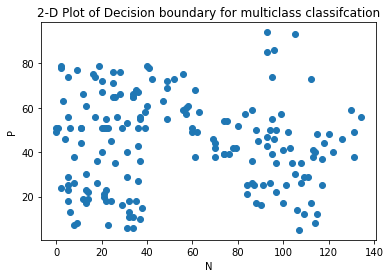

In [153]:
plt.scatter(xnew_train[:,0], xnew_train[:,1])
plt.title('2-D Plot of Decision boundary for multiclass classifcation')
plt.xlabel('N')
plt.ylabel('P')
plt.show()

In [154]:
clf = svm.SVC(kernel='rbf',C=1,gamma=0.1)

# Fit data
clf = clf.fit(xnew_train,ynew_train)
predictions = clf.predict(xnew_test)

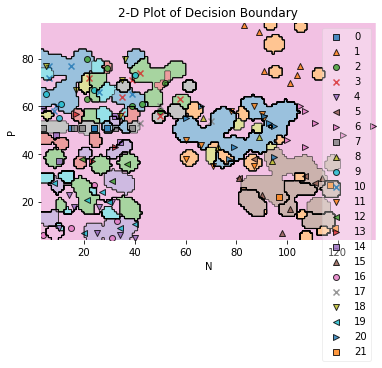

In [155]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plt.xlabel("N")
plt.ylabel("P")
plt.title("2-D Plot of Decision Boundary")
plot_decision_regions(xnew_test,ynew_test, clf=clf)
plt.show()

## MULTI-LAYER PERCEPTRON 

In [931]:
#Import required libraries 
import keras #library for neural network
from sklearn.preprocessing import normalize #machine learning algorithm library

In [932]:
crop_data_nn = crop_data_shuffled

In [933]:
crop_data_nn['code'] = LE.fit_transform(crop_data_shuffled['label'])

In [934]:
crop_data_nn

N   P   K  temperature   humidity        ph    rainfall       label  \
299    49  69  32    18.315615  80.473146  7.263119   81.787105    chickpea   
1859   37  10  32    28.963183  95.163337  6.165085   94.867624     coconut   
1939  122  48  16    24.654258  75.635071  6.307586   61.829801      cotton   
2194   97  35  26    24.914610  53.741447  6.334610  166.254931      coffee   
1861   31  29  35    27.187228  92.199068  6.137103  141.322058     coconut   
...   ...  ..  ..          ...        ...       ...         ...         ...   
2009   74  40  40    25.138428  83.120539  6.386260   94.867624        jute   
1180    1  29  29    27.329614  49.303472  6.052026   93.531974       mango   
1344  103  16  49    24.067315  81.640753  6.915717   51.752124  watermelon   
527    24  37  21    30.573999  58.226868  5.818219   62.748038   mothbeans   
1289   38  51  32    17.543830  82.947033  6.323723   73.770637      grapes   

      code  
299      3  
1859     4  
1939     6  
2194     5  
1861     4  
...    ...  
2009     8  
1180    12  
1344    21  
527     13  
1289     7  

[2200 rows x 9 columns]

In [935]:
X=crop_data_nn.iloc[:,0:7].values  #feature columns
y=crop_data_nn.iloc[:,-1].values 

In [936]:
pdx = pd.DataFrame(data=X,columns = ['N','P','K','temperature','humidity','ph','rainfall'])

In [937]:
pdx

N     P     K  temperature   humidity        ph    rainfall
0      49.0  69.0  32.0    18.315615  80.473146  7.263119   81.787105
1      37.0  10.0  32.0    28.963183  95.163337  6.165085   94.867624
2     122.0  48.0  16.0    24.654258  75.635071  6.307586   61.829801
3      97.0  35.0  26.0    24.914610  53.741447  6.334610  166.254931
4      31.0  29.0  35.0    27.187228  92.199068  6.137103  141.322058
...     ...   ...   ...          ...        ...       ...         ...
2195   74.0  40.0  40.0    25.138428  83.120539  6.386260   94.867624
2196    1.0  29.0  29.0    27.329614  49.303472  6.052026   93.531974
2197  103.0  16.0  49.0    24.067315  81.640753  6.915717   51.752124
2198   24.0  37.0  21.0    30.573999  58.226868  5.818219   62.748038
2199   38.0  51.0  32.0    17.543830  82.947033  6.323723   73.770637

[2200 rows x 7 columns]

In [938]:
X_norm = norm(pdx)

In [939]:
X_norm

N         P         K  temperature  humidity        ph  rainfall
0    -0.042035  0.474060 -0.318850    -1.441744  0.403856  1.025455 -0.394418
1    -0.367086 -1.314584 -0.318850     0.660961  1.063679 -0.393307 -0.156410
2     1.935356 -0.162576 -0.634756    -0.189975  0.186549 -0.209182 -0.757552
3     1.258167 -0.556684 -0.437315    -0.138560 -0.796824 -0.174264  1.142524
4    -0.529611 -0.738580 -0.259618     0.310241  0.930536 -0.429463  0.688856
...        ...       ...       ...          ...       ...       ...       ...
2195  0.635154 -0.405104 -0.160897    -0.094360  0.522766 -0.107528 -0.156410
2196 -1.342237 -0.738580 -0.378082     0.338360 -0.996159 -0.539390 -0.180713
2197  1.420693 -1.132688  0.016800    -0.305886  0.456300  0.576580 -0.940922
2198 -0.719224 -0.496052 -0.536036     0.979068 -0.595357 -0.841490 -0.740844
2199 -0.339998 -0.071628 -0.318850    -1.594158  0.514973 -0.188332 -0.540282

[2200 rows x 7 columns]

In [940]:
total_length=len(crop_data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_norm[:train_length]
X_test=X_norm[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 1760 y: 1760
Length of test set x: 440 y: 440


In [942]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [943]:
#Change the label to one hot vector
#forming a diagonal matrix of the target dataset
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=22)
y_test=np_utils.to_categorical(y_test,num_classes=22)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (1760, 22)
Shape of y_test (440, 22)


In [944]:
model=Sequential()
model.add(Dense(100,input_dim=7,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(22,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [945]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_35 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_36 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 22)                682       
Total params: 8,062
Trainable params: 8,062
Non-trainable params: 0
_________________________________________________________________


In [1032]:
np.random.seed(10)
start = time.time()
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=50,verbose=1)
end = time.time()

print("Time for NN ", end-start)

Epoch 1/50
352/352 [==============================] - 3s 9ms/step - loss: 0.0229 - accuracy: 0.9903 - val_loss: 0.0589 - val_accuracy: 0.9773
Epoch 2/50
352/352 [==============================] - 2s 7ms/step - loss: 0.0263 - accuracy: 0.9898 - val_loss: 0.0523 - val_accuracy: 0.9841
Epoch 3/50
352/352 [==============================] - 2s 6ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.0725 - val_accuracy: 0.9727
Epoch 4/50
352/352 [==============================] - 2s 7ms/step - loss: 0.0244 - accuracy: 0.9915 - val_loss: 0.0800 - val_accuracy: 0.9818
Epoch 5/50
352/352 [==============================] - 3s 7ms/step - loss: 0.0326 - accuracy: 0.9909 - val_loss: 0.0909 - val_accuracy: 0.9727
Epoch 6/50
352/352 [==============================] - 2s 6ms/step - loss: 0.0172 - accuracy: 0.9926 - val_loss: 0.0665 - val_accuracy: 0.9773
Epoch 7/50
352/352 [==============================] - 2s 7ms/step - loss: 0.0181 - accuracy: 0.9915 - val_loss: 0.0708 - val_accuracy: 0.9773
Epoch 

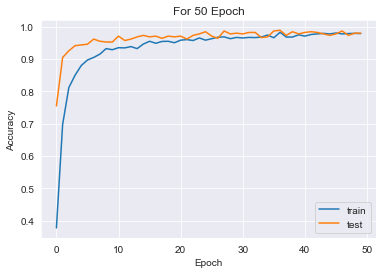

In [947]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("For 50 Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## LASSO & RIDGE REGULARIZATION

In [996]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [997]:
X = crop_data[['N','P','K','temperature','humidity','ph','rainfall']].values
y = crop_data['label'].values
y = LE.fit_transform(y)

# Store the column/feature names into a list "colnames"
colnames = features.columns

In [1091]:
# Determine the value of alpha
from sklearn.linear_model import MultiTaskLassoCV, RidgeCV
regr_cv = MultiTaskLassoCV(alphas=[0.01,0.02,0.1,0.2, 1.0, 10.0])
model_cv = regr_cv.fit(X_train,y_train)
print("Alpha for Lasso Regression:",model_cv.alpha_)

Alpha for Lasso Regression: 0.01


In [1094]:
# create a lasso regressor
lasso = Lasso(alpha=0.01, normalize=True)
# Fit the regressor to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.00166743 -0.08870329  0.02094729  0.         -0.          0.
 -0.02143668]


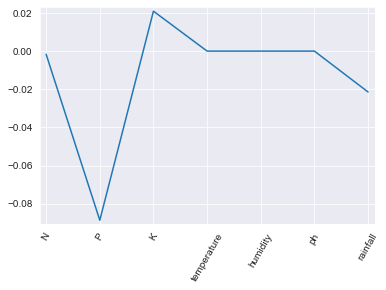

In [1095]:
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [1098]:
from sklearn.linear_model import Lasso
## training the model
lassoReg = Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)
#calculating mse
mse = np.mean((pred - y_test)**2)
print(mse)

0.04343650216003006


In [1099]:
lassoReg.score(X_test,y_test)

-0.003284166504508407

### Ridge Regression 

In [1096]:
#hyperparameter tuning for Ridge Regression
ridge_cv = RidgeCV(alphas=[0.01,0.1, 1.0, 10.0])
model_cv = ridge_cv.fit(X_train,y_train)
print("Alpha for Ridge Regression:",model_cv.alpha_)

Alpha for Ridge Regression: 1.0


In [1087]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=1, normalize=True)
ridgeReg.fit(X,y)
ridge_coef = ridgeReg.coef_
print(ridge_coef)

[-0.00756139 -0.05605832  0.0400693   0.02244065 -0.01156729  0.12310138
 -0.0178925 ]


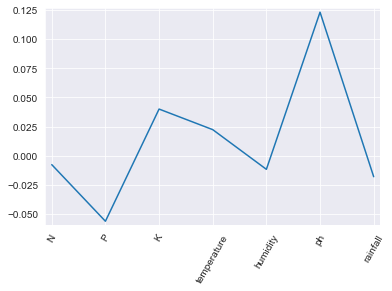

In [1088]:
plt.plot(range(len(colnames)), ridge_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [1100]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=1, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)
#calculating mse
mse = np.mean((pred - y_test)**2)
print("MSE:",mse)

MSE: 0.035986345792843655


In [1083]:
#R-squared score
ridgeReg.score(X_test,y_test)

0.17297352771742094